In [2]:
import pandas as pd
import numpy as np
#generate noisy data
x=np.linspace(2,100,250)
y=2*x+1
noise = np.random.uniform(low=-1, high=1, size=x.shape)
y=y+noise

In [4]:
#prepare data for pytorch
import torch

x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

x=x.view(-1,1)
y=x.view(-1,1)

print("x_tensor shape:", x.shape)
print("y_tensor shape:", y.shape)

x_tensor shape: torch.Size([250, 1])
y_tensor shape: torch.Size([250, 1])


In [9]:
import torch.nn as nn
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # One input → One output

    def forward(self, x):
        return self.linear(x)

# Create an instance
model = LinearRegressionModel()
print(model)


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Epoch 10, Loss: 0.1216
Epoch 20, Loss: 0.0284
Epoch 30, Loss: 0.0193
Epoch 40, Loss: 0.0163
Epoch 50, Loss: 0.0112
Epoch 60, Loss: 0.0073
Epoch 70, Loss: 0.0047
Epoch 80, Loss: 0.0030
Epoch 90, Loss: 0.0019
Epoch 100, Loss: 0.0011


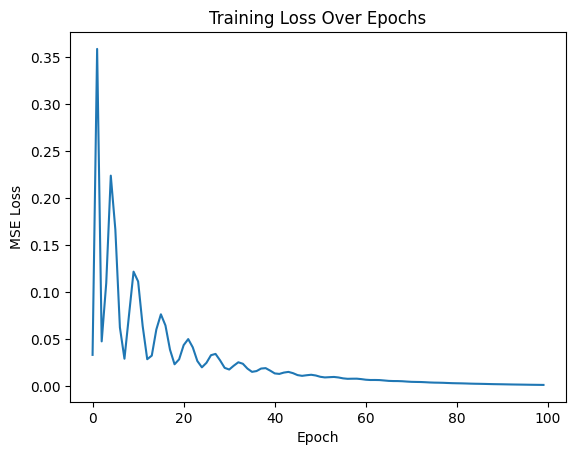

In [13]:
import matplotlib.pyplot as plt
# train setup
loss_fn=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

loss_history=[]

for epoch in range(100):
    #  Forward pass
    predictions = model(x)
    
    # Compute loss
    loss = loss_fn(predictions, y)
    
    # Backward pass
    optimizer.zero_grad()   # Clear old gradients
    loss.backward()         # Compute new gradients
    
    #  Update weights
    optimizer.step()

    # save loss
    loss_history.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Epochs")
plt.show()        

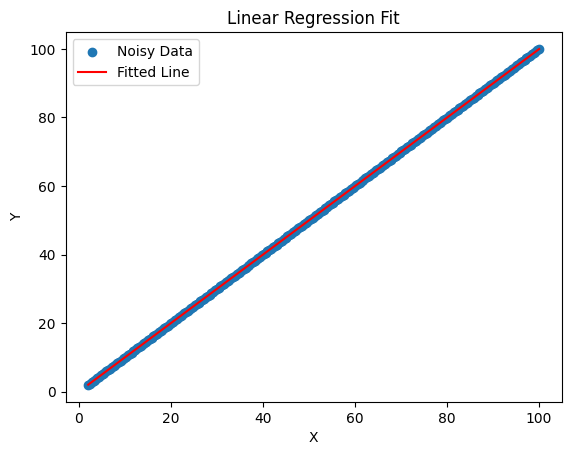

In [16]:
import matplotlib.pyplot as plt

with torch.no_grad():
    predicted = model(x)

plt.scatter(x, y, label="Noisy Data")   # Original noisy points
plt.plot(x, predicted, color='red', label="Fitted Line")  # Model predictions
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
